Integráljuk trapéz módszerrel az $xsin(x)$ függvényt a $[0,1.5]$ intervallumon 5-részre osztással!

In [15]:
import numpy as np
a,b=0.0,1.5 #ezen akarunk integrálni
m=5 # ennyi részre osztjuk az intervallumot
def func(x): # ezt a fv-t akarjuk integrálni
    return(x*np.sin(x))

**Egyszerű** trapéz-formula:
$$
T(f,a,b)=\frac{b-a}{2}\left( f(a)+f(b)\right)
$$

**Összetett** trapéz-formula:
$$
T(f,a,b,m)=\frac{b-a}{2m}\left( f(x_0)+2f(x_1)+\ldots+2f(x_{m-1})+f(x_m) \right)
$$

In [16]:
def trapéz(f,a,b,m):
    beosztás=np.linspace(start=a,stop=b,num=m+1)
    return (b-a)/(2*m)*(2*np.sum(f(beosztás))-(f(a)+f(b)))

In [17]:
print(trapéz(func,a,b,m))

0.899701172344


Hogyan ellenőrizzük az eredményt? Mivel közelítő értéket számolunk ami függ $m$-től, ezért az ellenőrzésen az $m$ növelésével a "pontos" értékhez való közeledés teljesülését *is* értjük. A "pontos" érték is kiszámolható python-nal:
a **scipy.integrate** modulban megvan az összes klasszikus integrálásos cucc: [https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

In [18]:
import scipy.integrate as spq
print(spq.quad(func,a,b))

(0.8913891841025001, 9.896407960924282e-15)


**Hiba, egyszerű** trapéz-formula:
$$
\left| T(f,a,b)-\int_a^b f \right| \le \frac{M_{2}\left(b-a\right)^3}{12}
$$
**Hiba, összetett** trapéz-formula:
$$
\left| T(f,a,b,m)-\int_a^b f \right| \le \frac{M_2(b-a)^3}{12m^2}
$$



Mekkora $m$-et válasszunk a fenti esetben ha $\delta=\frac{1}{10000}$-nél kisebb hibát akarunk? Fejezzük ki az egyenlőtlenségből $m$-et:
$$
\sqrt{\frac{M_2(b-a)^3}{12\delta}} < m
$$
gyakran $M_2$-t nehéz pontosan kiszámolni: adjunk rá felső becslést!
$$
f^{'}(x)=sin(x)+xcos(x)
$$
$$
f^{''}(x)=cos(x)+cos(x)-xsin(x)
$$
$$
|f^{''}(x)|\le2+1.5=3.5
$$
ekkor:


In [19]:
delta=1e-4
M2=3.5
np.sqrt(M2*(b-a)**3/(12*delta))

99.215674164922135

tehát $m=100$ biztosan elég a kívánt pontossághoz. (nem szükséges ennyi általában)

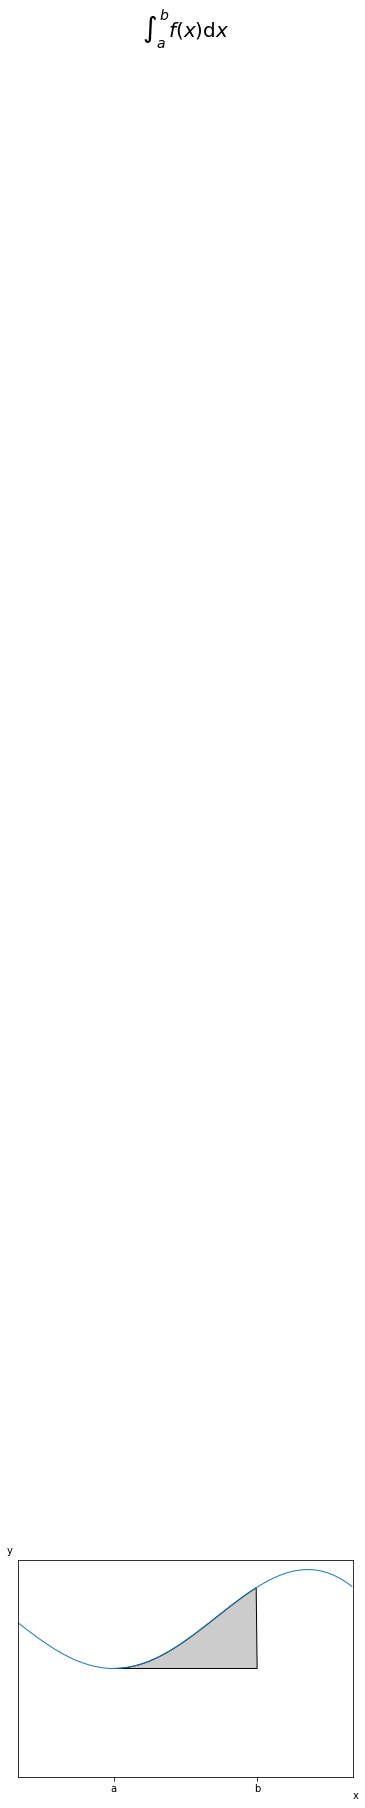

In [26]:
import pylab
from matplotlib.patches import Polygon

ax = subplot(111)
aa=a-1
bb=b+1
x = arange(aa,bb, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([aa,bb, -2, 2])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()